# Part8: Data Preparation

### 1- Dealing with Outliers

**Definition:**

**In Statistics, on outlier is a data point that differs significantly from other observations (Grubbs, 1969; Maddala, 1992).**

**An outlier may be due to variability in the measurement or it may indicate experimental error, the latter are sometimes excluded from the data set (Grubbs, 1969).**

**Anoutlier can couse serious problem in statistical analysis.**

* [Wikipedia Article](http://en.wikipedia.org/wiki/Outlier)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Import Ames House Dataset
df= pd.read_csv('Housing_Data.csv')

In [4]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
#Our objective is to predict the SalePrice based on several Features, 
# Correlation overview:
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

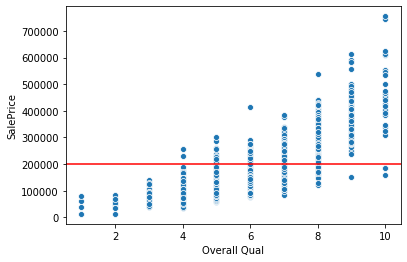

In [7]:
sns.scatterplot(data=df, x='Overall Qual', y='SalePrice')
plt.axhline(y=200000,color='r')

In [8]:
df[(df['Overall Qual']>8) &(df['SalePrice']<200000)][['SalePrice', 'Overall Qual']]

,SalePrice,Overall Qual
1182,150000,9
1498,160000,10
2180,183850,10
2181,184750,10


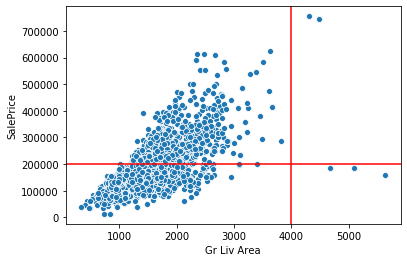

In [9]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)
plt.axhline(y=200000, color='r')
plt.axvline(x=4000, color='r')

In [10]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)][['SalePrice', 'Gr Liv Area']]

,SalePrice,Gr Liv Area
1498,160000,5642
2180,183850,5095
2181,184750,4676


In [11]:
#Remove the outliers:
index_drop=df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index
df=df.drop(index_drop, axis=0)

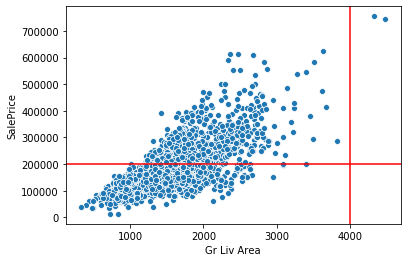

In [12]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)
plt.axhline(y=200000, color='r')
plt.axvline(x=4000, color='r')

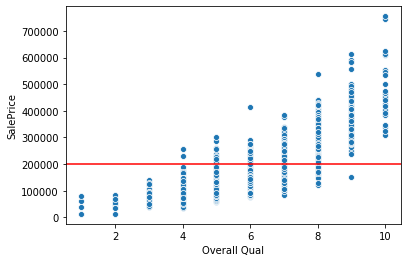

In [13]:
sns.scatterplot(x='Overall Qual', y='SalePrice', data=df)
plt.axhline(y=200000,color='r')

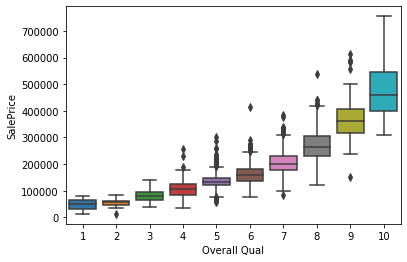

In [14]:
sns.boxplot(x='Overall Qual', y='SalePrice', data=df)

## 2-Dealing with Missing Data

**In statistics, missing data, or missing values, occur when no data value is stored for the variable in an observation. missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.**

[Wikipedia Article](http://en.wikipedia.org/wiki/Missing_data)


In [15]:
#open the documentation about the data set. (this file is in a txt format)

with open('Ames_Housing_Feature_Description.txt', 'r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [16]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 81 columns):
PID                2927 non-null int64
MS SubClass        2927 non-null int64
MS Zoning          2927 non-null object
Lot Frontage       2437 non-null float64
Lot Area           2927 non-null int64
Street             2927 non-null object
Alley              198 non-null object
Lot Shape          2927 non-null object
Land Contour       2927 non-null object
Utilities          2927 non-null object
Lot Config         2927 non-null object
Land Slope         2927 non-null object
Neighborhood       2927 non-null object
Condition 1        2927 non-null object
Condition 2        2927 non-null object
Bldg Type          2927 non-null object
House Style        2927 non-null object
Overall Qual       2927 non-null int64
Overall Cond       2927 non-null int64
Year Built         2927 non-null int64
Year Remod/Add     2927 non-null int64
Roof Style         2927 non-null object
Roof Matl          2

### Fill/Keep/Drop?

In [19]:
#Removing the PID (We already have an index, so we don't need PID unique identifier. 
#becuase it doesn't have any information and can't help our learning models)

df= df.drop('PID', axis=1)

### A- How Much Data is Missing?

In [20]:
df.isnull()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2926,False,False,True,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2927,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2928,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [22]:
#How many missing data is there in each features?
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [23]:
#The percent of missing data in any feature:
100*(df.isnull().sum()/len(df))

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [27]:
#Make a Function to calculate the percent of missing data in each columns (feature) and then sort it
def missing_percent(df):
    nan_percent= 100*(df.isnull().sum()/len(df))
    nan_percent= nan_percent[nan_percent>0].sort_values()
    return nan_percent

In [28]:
nan_percent= missing_percent(df)

In [29]:
nan_percent

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

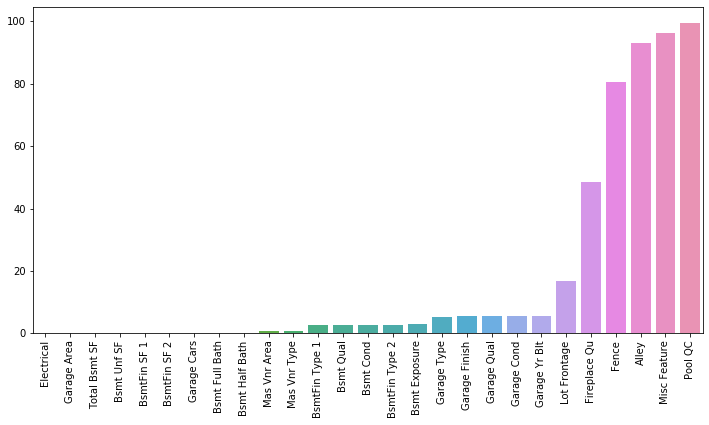

In [33]:
#plot the feature with missing indicating the percent of missing data
plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

### B- Working base on Rows Missing Data

**If only a few rows are missing some values, then it might just be a good idea to drop those rows.** 

**What does this cost you in terms of performace? It essentialy removes potential training/testing data, but if its only a few rows, its unlikely to change performance.**


**Sometimes it is a good idea to remove a feature entirely if it has too many null values. However, you should carefully consider why it has so many null values, in certain situations null could just be used as a separate category.** 

(Take for example a feature column for the number of cars that can fit into a garage. Perhaps if there is no garage then there is a null value, instead of a zero. It probably makes more sense to quickly fill the null values in this case with a zero instead of a null. Only you can decide based off your domain expertise and knowledge of the data set!)

(0, 1)

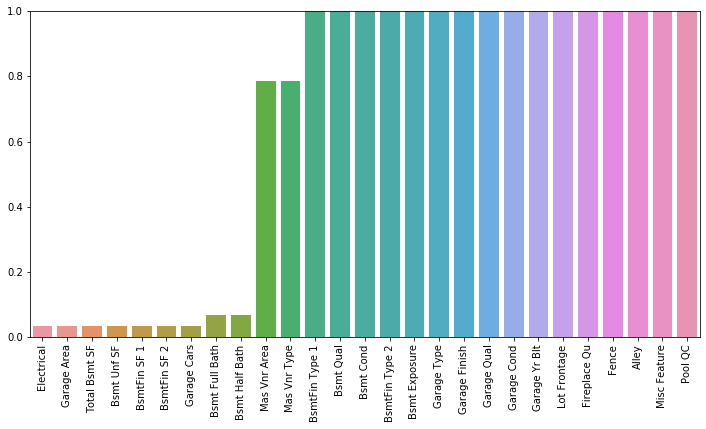

In [35]:
#every Feature with missing data must be checked!
#We choose a threshold of 1%. It means, if there is less than 1% of a feature are missing,
#then we will consider just dropping that rows

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

#Set 1% threshold:
plt.ylim(0,1)

In [40]:
nan_percent[nan_percent<1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [39]:
nan_percent[nan_percent<1].index

Index(['Electrical', 'Garage Area', 'Total Bsmt SF', 'Bsmt Unf SF',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Garage Cars', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Mas Vnr Area', 'Mas Vnr Type'],
      dtype='object')

In [42]:
100/len(df)
#It shows that, Feature with just one missing rows has this percent value of missing data

0.0341646737273659

In [43]:
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [44]:
df[df['Garage Area'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2236,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


### Dropping Rows:

In [57]:
df= df.dropna(axis=0, subset=['Electrical', 'Garage Area'])

(0, 1)

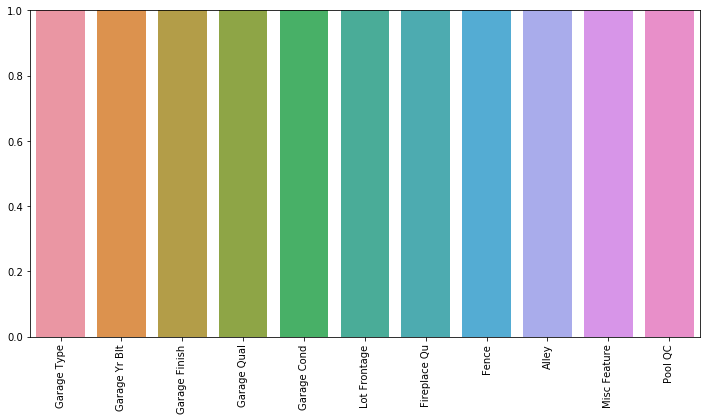

In [64]:
nan_percent= missing_percent(df)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)
plt.ylim(0,1)

### Filling the missing values:

In [45]:
#Features related to Basement:

In [46]:
df[df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [48]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [49]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [55]:
#After checking the data documentation,
#it shows that missing value (two rows) in Basement Features are becouse of there is no basement in these rows
#Decision: Filling in data based on column: numerical basement & string descriptive:

#Numerical Columns fill with 0:
bsmt_num_cols= ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF' ,'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols]=df[bsmt_num_cols].fillna(0)

#String Columns fill with None:
bsmt_str_cols= ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols]= df[bsmt_str_cols].fillna('None')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

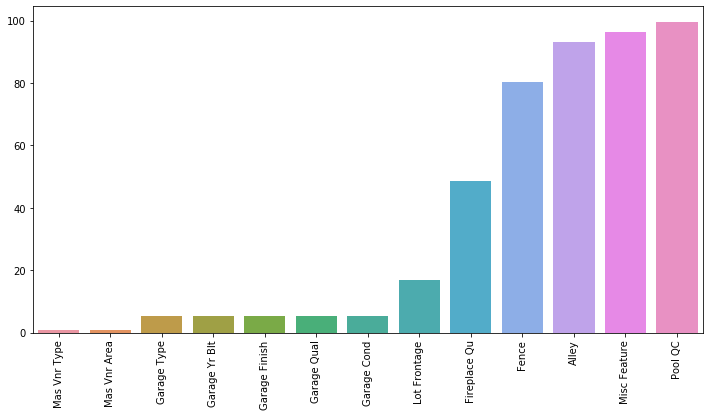

In [59]:
nan_percent= missing_percent(df)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)
plt.ylim(0,1)

**Mas Vnr Features:**

Based on the Dataset Document File, missing values for 'Mas Vnr Type' and 'Mas Vnr Area' means the house doesn't have any mansonry veneer. so, we decide to fill the missing value as below: 

In [62]:
df["Mas Vnr Type"]= df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"]= df["Mas Vnr Area"].fillna(0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

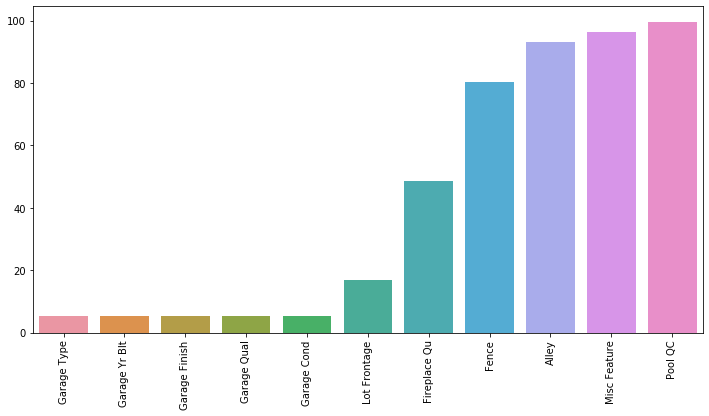

In [66]:
nan_percent= missing_percent(df)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)


### Garage Columns:
**Based on the dataset documentation, NaN in Garage Columns seems to indicate no garage.**

**Decision: Fill with 'None' or 0**

In [68]:
df[['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Finish,Garage Qual,Garage Cond,Garage Yr Blt
0,Attchd,Fin,TA,TA,1960.0
1,Attchd,Unf,TA,TA,1961.0
2,Attchd,Unf,TA,TA,1958.0
3,Attchd,Fin,TA,TA,1968.0
4,Attchd,Fin,TA,TA,1997.0
...,...,...,...,...,...
2925,Detchd,Unf,TA,TA,1984.0
2926,Attchd,Unf,TA,TA,1983.0
2927,NaN,NaN,NaN,NaN,NaN
2928,Attchd,RFn,TA,TA,1975.0


In [71]:
#Filling the missing Value:
Gar_str_cols= ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[Gar_str_cols]=df[Gar_str_cols].fillna('None')

df['Garage Yr Blt']=df['Garage Yr Blt'].fillna(0)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

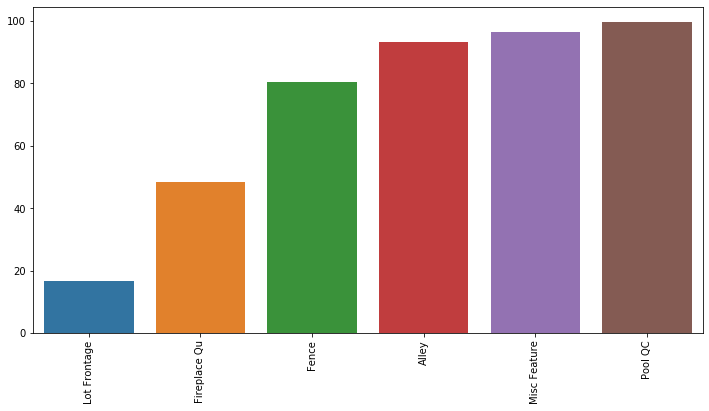

In [72]:
nan_percent= missing_percent(df)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)


### C-Working based on Columns Missing Data

In [73]:
nan_percent.index

Index(['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature',
       'Pool QC'],
      dtype='object')

In [74]:
df[['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature',
       'Pool QC']]

,Lot Frontage,Fireplace Qu,Fence,Alley,Misc Feature,Pool QC
0,141.0,Gd,NaN,NaN,NaN,NaN
1,80.0,NaN,MnPrv,NaN,NaN,NaN
2,81.0,NaN,NaN,NaN,Gar2,NaN
3,93.0,TA,NaN,NaN,NaN,NaN
4,74.0,TA,MnPrv,NaN,NaN,NaN
...,...,...,...,...,...,...
2925,37.0,NaN,GdPrv,NaN,NaN,NaN
2926,NaN,NaN,MnPrv,NaN,NaN,NaN
2927,62.0,NaN,MnPrv,NaN,Shed,NaN
2928,77.0,TA,NaN,NaN,NaN,NaN


**Remove the Columns with more than 80% missing values**

In [75]:
df= df.drop(['Fence', 'Alley', 'Misc Feature','Pool QC'], axis=1)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

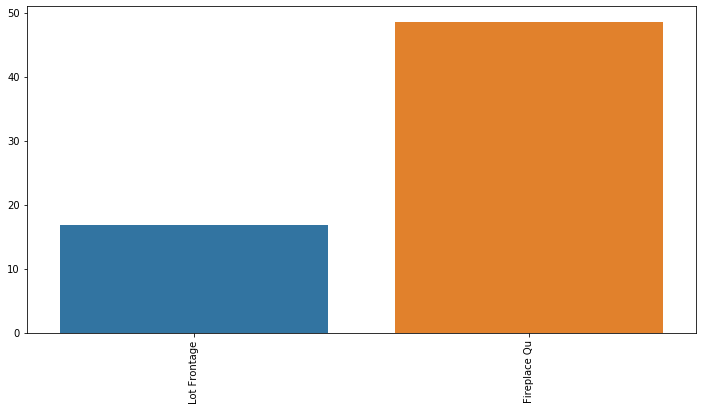

In [76]:
nan_percent= missing_percent(df)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

In [77]:
#Filling in Fireplace Quality based on dataset documentation:
df['Fireplace Qu']= df['Fireplace Qu'].fillna('None')

(array([0]), <a list of 1 Text xticklabel objects>)

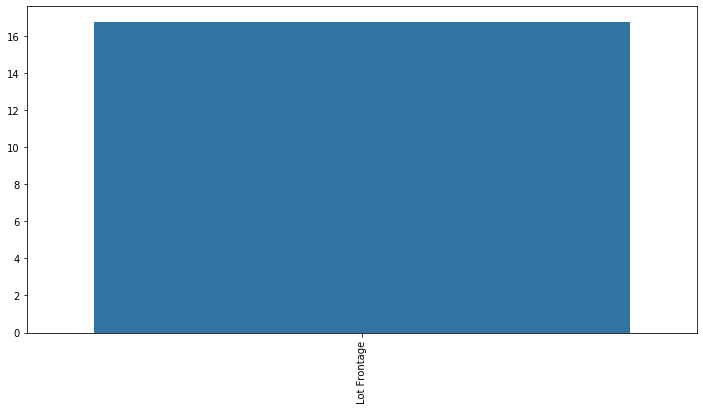

In [78]:
nan_percent= missing_percent(df)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

### D- Imputation of Missing Data

**Columns: Lot Frontage**

**We assume that the Lot Frontage is related to what a Neighborhood a house is in**

In [79]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

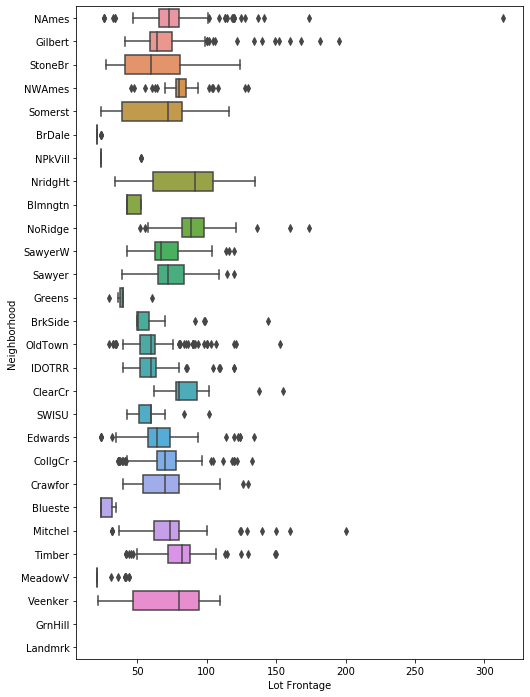

In [82]:
plt.figure(figsize=(8,12))
sns.boxplot(data=df, x='Lot Frontage', y='Neighborhood')

In [83]:
#Impute missing data based on other columns:

df.groupby('Neighborhood')['Lot Frontage']

In [84]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [85]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2925     37.000000
2926     75.144444
2927     62.000000
2928     77.000000
2929     74.000000
Name: Lot Frontage, Length: 2925, dtype: float64

In [86]:
df['Lot Frontage']=df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

(array([0]), <a list of 1 Text xticklabel objects>)

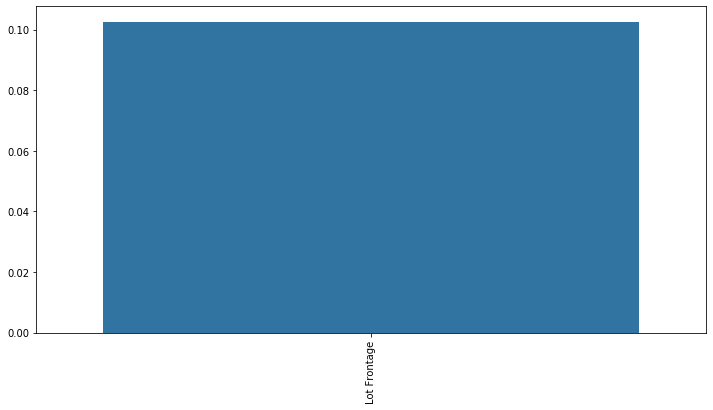

In [87]:
nan_percent= missing_percent(df)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

In [88]:
df['Lot Frontage']= df['Lot Frontage'].fillna(0)

In [90]:
nan_percent= missing_percent(df)


In [91]:
nan_percent

Series([], dtype: float64)

**We don't have any Missing Data**

## 3-Dealing with Categorical Data

#### A- Numerical Columns to Categorical
We need to be careful when it comes to encoding categorical as numbers. We want to make sure that the numerical relationship makes sense for model. For example, the encoding MSSubClass is essentially just a code per class

In [99]:
df['MS SubClass']

0       20
1       20
2       20
3       20
4       60
        ..
2925    80
2926    20
2927    85
2928    20
2929    60
Name: MS SubClass, Length: 2925, dtype: int64

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 76 columns):
MS SubClass        2925 non-null int64
MS Zoning          2925 non-null object
Lot Frontage       2925 non-null float64
Lot Area           2925 non-null int64
Street             2925 non-null object
Lot Shape          2925 non-null object
Land Contour       2925 non-null object
Utilities          2925 non-null object
Lot Config         2925 non-null object
Land Slope         2925 non-null object
Neighborhood       2925 non-null object
Condition 1        2925 non-null object
Condition 2        2925 non-null object
Bldg Type          2925 non-null object
House Style        2925 non-null object
Overall Qual       2925 non-null int64
Overall Cond       2925 non-null int64
Year Built         2925 non-null int64
Year Remod/Add     2925 non-null int64
Roof Style         2925 non-null object
Roof Matl          2925 non-null object
Exterior 1st       2925 non-null object
Exterior 2nd      

In [102]:
df['MS SubClass'].unique()

array([ 20,  60, 120,  50,  85, 160,  80,  30,  90, 190,  45,  70,  75,
        40, 180, 150])

In [103]:
#Convert to String:
df['MS SubClass']= df['MS SubClass'].apply(str)

In [104]:

df.info()
#or: df['MS SubClass'].dtype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 76 columns):
MS SubClass        2925 non-null object
MS Zoning          2925 non-null object
Lot Frontage       2925 non-null float64
Lot Area           2925 non-null int64
Street             2925 non-null object
Lot Shape          2925 non-null object
Land Contour       2925 non-null object
Utilities          2925 non-null object
Lot Config         2925 non-null object
Land Slope         2925 non-null object
Neighborhood       2925 non-null object
Condition 1        2925 non-null object
Condition 2        2925 non-null object
Bldg Type          2925 non-null object
House Style        2925 non-null object
Overall Qual       2925 non-null int64
Overall Cond       2925 non-null int64
Year Built         2925 non-null int64
Year Remod/Add     2925 non-null int64
Roof Style         2925 non-null object
Roof Matl          2925 non-null object
Exterior 1st       2925 non-null object
Exterior 2nd     

### B- Creating Dummy Variables

In [105]:
df.select_dtypes(include='object')

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2926,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2927,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal
2928,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [106]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')

In [107]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 36 columns):
Lot Frontage       2925 non-null float64
Lot Area           2925 non-null int64
Overall Qual       2925 non-null int64
Overall Cond       2925 non-null int64
Year Built         2925 non-null int64
Year Remod/Add     2925 non-null int64
Mas Vnr Area       2925 non-null float64
BsmtFin SF 1       2925 non-null float64
BsmtFin SF 2       2925 non-null float64
Bsmt Unf SF        2925 non-null float64
Total Bsmt SF      2925 non-null float64
1st Flr SF         2925 non-null int64
2nd Flr SF         2925 non-null int64
Low Qual Fin SF    2925 non-null int64
Gr Liv Area        2925 non-null int64
Bsmt Full Bath     2925 non-null float64
Bsmt Half Bath     2925 non-null float64
Full Bath          2925 non-null int64
Half Bath          2925 non-null int64
Bedroom AbvGr      2925 non-null int64
Kitchen AbvGr      2925 non-null int64
TotRms AbvGrd      2925 non-null int64
Fireplaces         

In [108]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 40 columns):
MS SubClass       2925 non-null object
MS Zoning         2925 non-null object
Street            2925 non-null object
Lot Shape         2925 non-null object
Land Contour      2925 non-null object
Utilities         2925 non-null object
Lot Config        2925 non-null object
Land Slope        2925 non-null object
Neighborhood      2925 non-null object
Condition 1       2925 non-null object
Condition 2       2925 non-null object
Bldg Type         2925 non-null object
House Style       2925 non-null object
Roof Style        2925 non-null object
Roof Matl         2925 non-null object
Exterior 1st      2925 non-null object
Exterior 2nd      2925 non-null object
Mas Vnr Type      2925 non-null object
Exter Qual        2925 non-null object
Exter Cond        2925 non-null object
Foundation        2925 non-null object
Bsmt Qual         2925 non-null object
Bsmt Cond         2925 non-null obj

In [109]:
# Converting:
df_obj= pd.get_dummies(df_obj, drop_first=True)

In [111]:
df_obj.shape

(2925, 238)

In [112]:
Final_df= pd.concat([df_num, df_obj], axis=1)

In [113]:
Final_df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
